# Lab for module 3 lesson 1

Topics covered
- Measures of central tendency (mean, median, *etc.*)
- Measures of dispersion (variance, standard deviation, quantiles, *etc.*)
- Interpreting descriptive statistics

**Problem Statement & Data Description**

*Client: ABC Retail, Incorporated, rest-of-the-world division* 

***Project name: Online retail sales analysis*** 

An online retailer, ABC, Inc., operates in nearly 100 countries worldwide, selling furniture, office supplies and technology products to customers in three segments: consumer, corporate and home office. ABC, Inc. is a US-based company, and it has two major divisions: US and rest of the world. We are working with the rest of the world division of the company. 

They have provided us with online sales transaction data from 2011 to 2014.

We are given 3 datasets:-

1. Data on each sale; 51290 records; all data in US dollars
It contains fields like
**order_id** (identifier) ,order_date ,ship_date ,ship_mode ,**customer_id**(identifier) ,product_id ,category ,sub_category ,product_name ,sales ,quantity ,discount ,profit ,shipping_cost ,order_priority ,**vendor_code** (identifier) 


2. Data on the customers; 1590 records 
It contains fields like
**customer_id** (identifier) ,customer_name ,city ,state ,country ,postal_code ,segment ,market ,region 

3. Data on vendors who supply the retailer; 65 records 
It contains fields like
vendor ,**vendor_code** (identifier) 

We need to analyze the data and need to provide answer to different questions asked by company officials.

In [ ]:
# reading the data , libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
# Use the warning filter context manager to temporarily suppress warnings
warnings.filterwarnings("ignore")

sales = pd.read_csv('sales_data.csv')
vendors=pd.read_csv('vendors.csv')
sales.head()

### Q1. In which year did the 'Furniture' category yield the highest average profit per transaction? And in which year was there the highest variability?

**Hint:** standard deviation is a good measure of variability in this context

In [2]:
# write your code here

### Q2. Is there a big difference in the sales amounts between the different shipping modes? In other words, is there any pattern that suggests higher value sales prefer 'First Class' shipping while lower value sales prefer 'Standard' shipping?

You might not be able to answer this statistically at this point, but you will be able to make a very good estimate

In [3]:
# write your code here

### Q3. Which vendor is associated with the smallest variation in sale amounts within the category 'Office Supplies'?

**Hint:**
- Use the vendor code, or get the vendor name from the vendors.csv data set)
- As before, standard deviation is a good measure of variation

In [4]:
# write your code here

### Q4. Which subcategory has the smallest IQR and which one has the largest IQR for sales?

You might need a little bit of data manipulation to get this one

In [5]:
# write your code here

### Q5. Plot a histogram of shipping cost. How would you describe the distribution?

In [6]:
# write your code here

## Solutions

In [7]:
# Q.1:-
# write your code here

### Extracting yr from order date
sales['order_date']=pd.to_datetime(sales['order_date'],format='%d/%m/%Y')


sales['order_yr']=sales['order_date'].dt.year

### Subsetting for Furniture data
furniture_sales= sales[sales['category']=='Furniture']

### Grouping on order year and aggregating profits with sum
furniture_sales_mean=furniture_sales.groupby('order_yr')['profit'].mean().sort_values(ascending=False)
print(f"Category Furniture yield the highest average profit per transaction in year {furniture_sales_mean.index[0]}.")

### Grouping on order year and aggregating profits with standard_deviation
furniture_sales_std=furniture_sales.groupby('order_yr')['profit'].std().sort_values(ascending=False)
print(f"Category Furniture yield the highest variability for profit per transaction in year {furniture_sales_std.index[0]}.")


Category Furniture yield the highest average profit per transaction in year 2013.
Category Furniture yield the highest variability for profit per transaction in year 2014.


ship_mode
First Class       1.784340e+06
Same Day          6.481297e+05
Second Class      2.486348e+06
Standard Class    7.327421e+06
Name: sales, dtype: float64


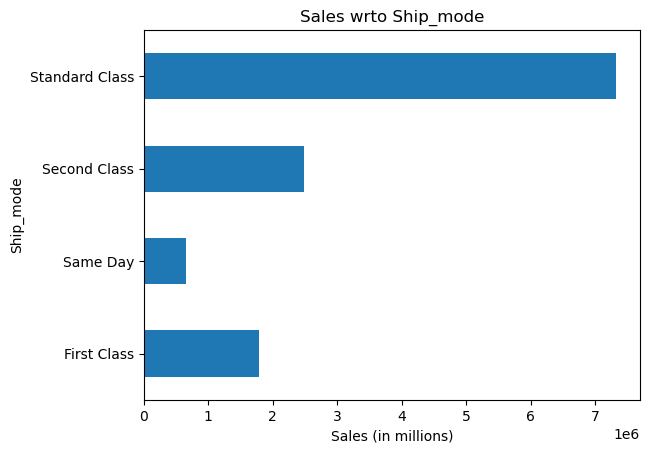

Difference in sales between standard class & first class is 5543080.335100001


In [8]:
# Q.2:-
### Grouping on ship mode and aggregating sales with sum
print(sales.groupby('ship_mode')['sales'].sum())

### Plotting sales for different shipping modes
sales.groupby('ship_mode')['sales'].sum().plot(kind='barh')
plt.xlabel('Sales (in millions)')
plt.ylabel('Ship_mode')
plt.title('Sales wrto Ship_mode')
plt.show()


sales_df=sales.groupby('ship_mode')['sales'].sum().reset_index()

### Calculating sales difference between standard class & first class
sdff_sc_fc=float(sales_df.loc[sales_df['ship_mode']=='Standard Class','sales'])-float(sales_df.loc[sales_df['ship_mode']=='First Class','sales'])
print(f'Difference in sales between standard class & first class is {sdff_sc_fc}')



In [9]:
# Q3 - ### In order to get sales details for vendors we need to merge the sales and vendor data.
sales=sales.merge(vendors,on='vendor_code',how='left')

In [10]:
# Continuing Q3 -
sales_os= sales[sales['category']=='Office Supplies']
sales_os.groupby('vendor')['sales'].std().sort_values(ascending=True)[0:1]

vendor
Whizystems    165.079419
Name: sales, dtype: float64

In [11]:
#Q.4:-
### IQR is basically difference between 3rd quartile & 1st quartile which tells you about spread.
def get_IQR(data):
    Q1= np.percentile(data,25)
    Q3= np.percentile(data,75)
    IQR= Q3- Q1
    return IQR

sales.groupby('sub_category')['sales'].apply(get_IQR).sort_values()
### As an exercise ,Extract the 1st & last values for IQR from this series.

sub_category
Labels          24.596250
Fasteners       30.447200
Binders         50.475000
Envelopes       67.126000
Paper           68.284350
Supplies        75.600000
Art             77.166800
Furnishings    117.480000
Accessories    206.955900
Storage        221.041000
Chairs         384.741750
Phones         420.140000
Machines       484.543125
Bookcases      524.820500
Copiers        546.590010
Appliances     617.335000
Tables         783.684000
Name: sales, dtype: float64

count    51290.000000
mean        26.375915
std         57.296804
min          0.000000
25%          2.610000
50%          7.790000
75%         24.450000
max        933.570000
Name: shipping_cost, dtype: float64


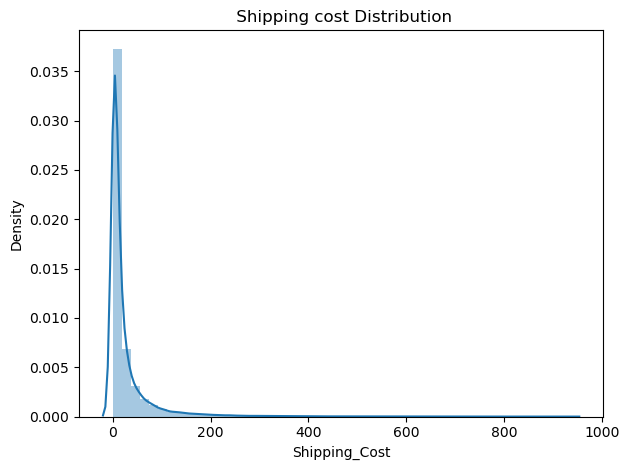

In [12]:
# Q5 - 

## Plotting distplot using seaborn 
sns.distplot(sales['shipping_cost'])
## plot title
plt.title(' Shipping cost Distribution')
## plot's x,y labels
plt.ylabel('Density')
plt.xlabel('Shipping_Cost')
plt.tight_layout()

print(sales['shipping_cost'].describe())

##### We could observe that the distribution is positively skewed.